# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками


### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

In [1]:
def gradient(X, y, w):
    # asset na type .....
    l = len(X)
    return (-2 / l) * X.T @ (y - X @ w)

In [2]:
%load_ext autoreload
%autoreload 2

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k}} + \varepsilon} \widehat{m}_{k}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [3]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [5]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [6]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [7]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [9]:
data = pd.read_csv('autos.csv')

In [10]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   brand              241190 non-null  object
 1   model              241190 non-null  object
 2   vehicleType        241190 non-null  object
 3   gearbox            241190 non-null  object
 4   fuelType           241190 non-null  object
 5   notRepairedDamage  241190 non-null  object
 6   powerPS            241190 non-null  int64 
 7   kilometer          241190 non-null  int64 
 8   autoAgeMonths      241190 non-null  int64 
 9   price              241190 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.4+ MB


In [12]:
data.isna().mean()

brand                0.0
model                0.0
vehicleType          0.0
gearbox              0.0
fuelType             0.0
notRepairedDamage    0.0
powerPS              0.0
kilometer            0.0
autoAgeMonths        0.0
price                0.0
dtype: float64

<Axes: >

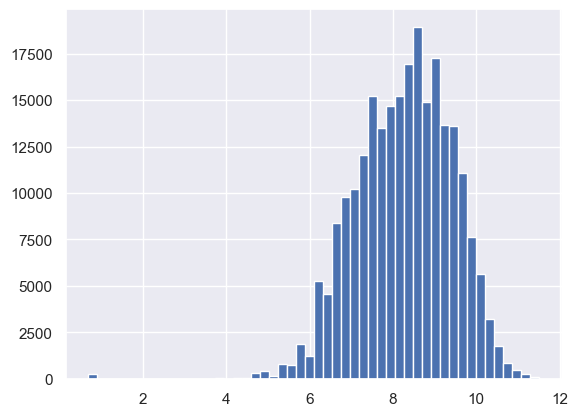

In [13]:
np.log1p(data['price']).hist(bins=50)

<Axes: >

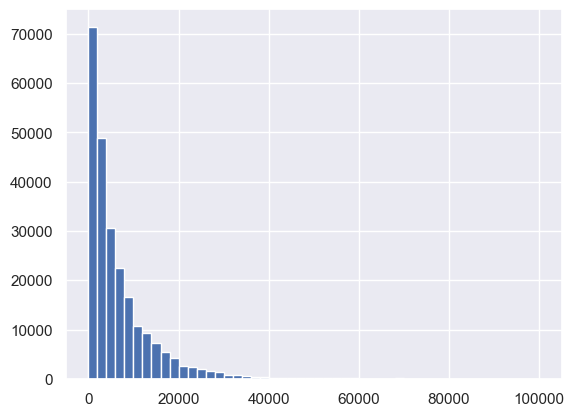

In [14]:
data['price'].hist(bins=50)

In [15]:
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['notRepairedDamage']
categorical = ['fuelType', 'brand', 'model',  'vehicleType', 'gearbox']
# YOUR CODE (EDA):

C:\Users\Мотян\AppData\Local\Temp\ipykernel_10388\3602425427.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(y=сorrelations.index, x=сorrelations,  palette='viridis')


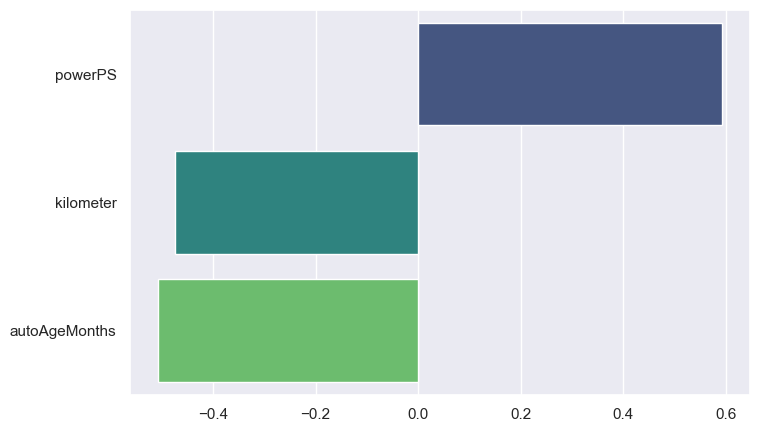

In [16]:
сorrelations = data[numeric].corrwith(data['price']).sort_values(ascending=False)

plot = sns.barplot(y=сorrelations.index, x=сorrelations,  palette='viridis')
plot.set(xlabel='', ylabel='')
plot.figure.set_size_inches(8, 5)

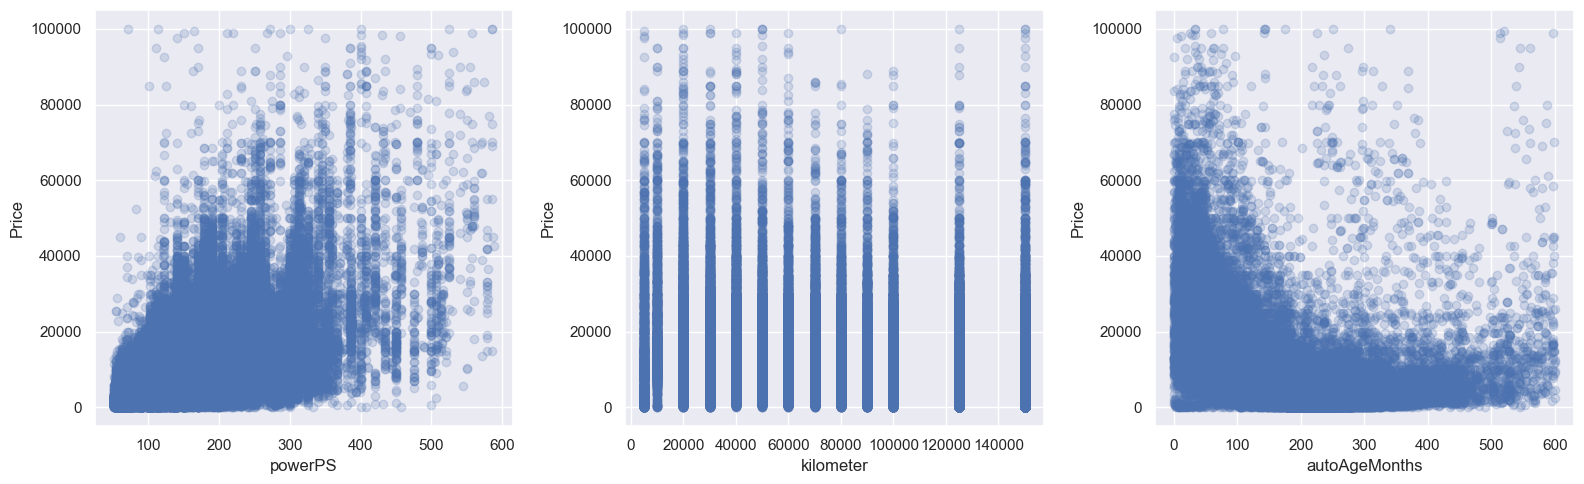

In [17]:
fig, axs = plt.subplots(figsize=(16, 5), ncols=3)
for i, feature in enumerate(numeric):
    axs[i].scatter(data[feature], data['price'], alpha=0.2)
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel("Price")
plt.tight_layout()

<Axes: >

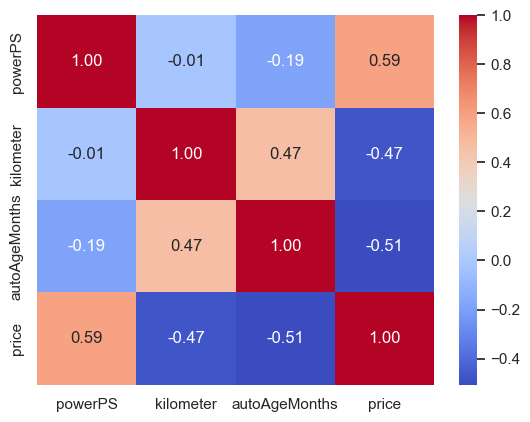

In [18]:
columns_for_heatmap = numeric + ['price']
corr = data[columns_for_heatmap].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')


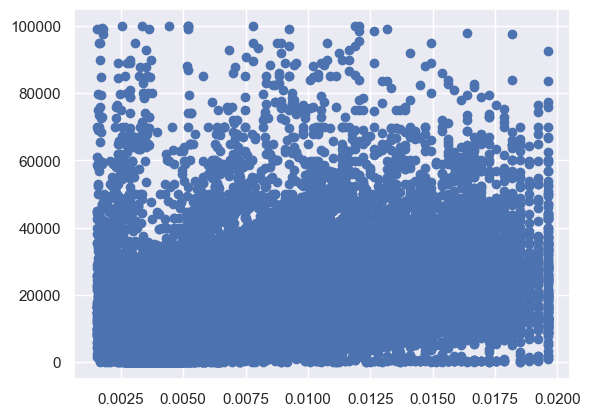

In [19]:
plt.scatter(x = data['autoAgeMonths'].apply(lambda x: 1 / (x + 50)), y = data['price'])

In [20]:
np.corrcoef(data['autoAgeMonths'].apply(lambda x: 1 / (x + 50)).values,  data['price'].values)

array([[1.        , 0.64566468],
       [0.64566468, 1.        ]])

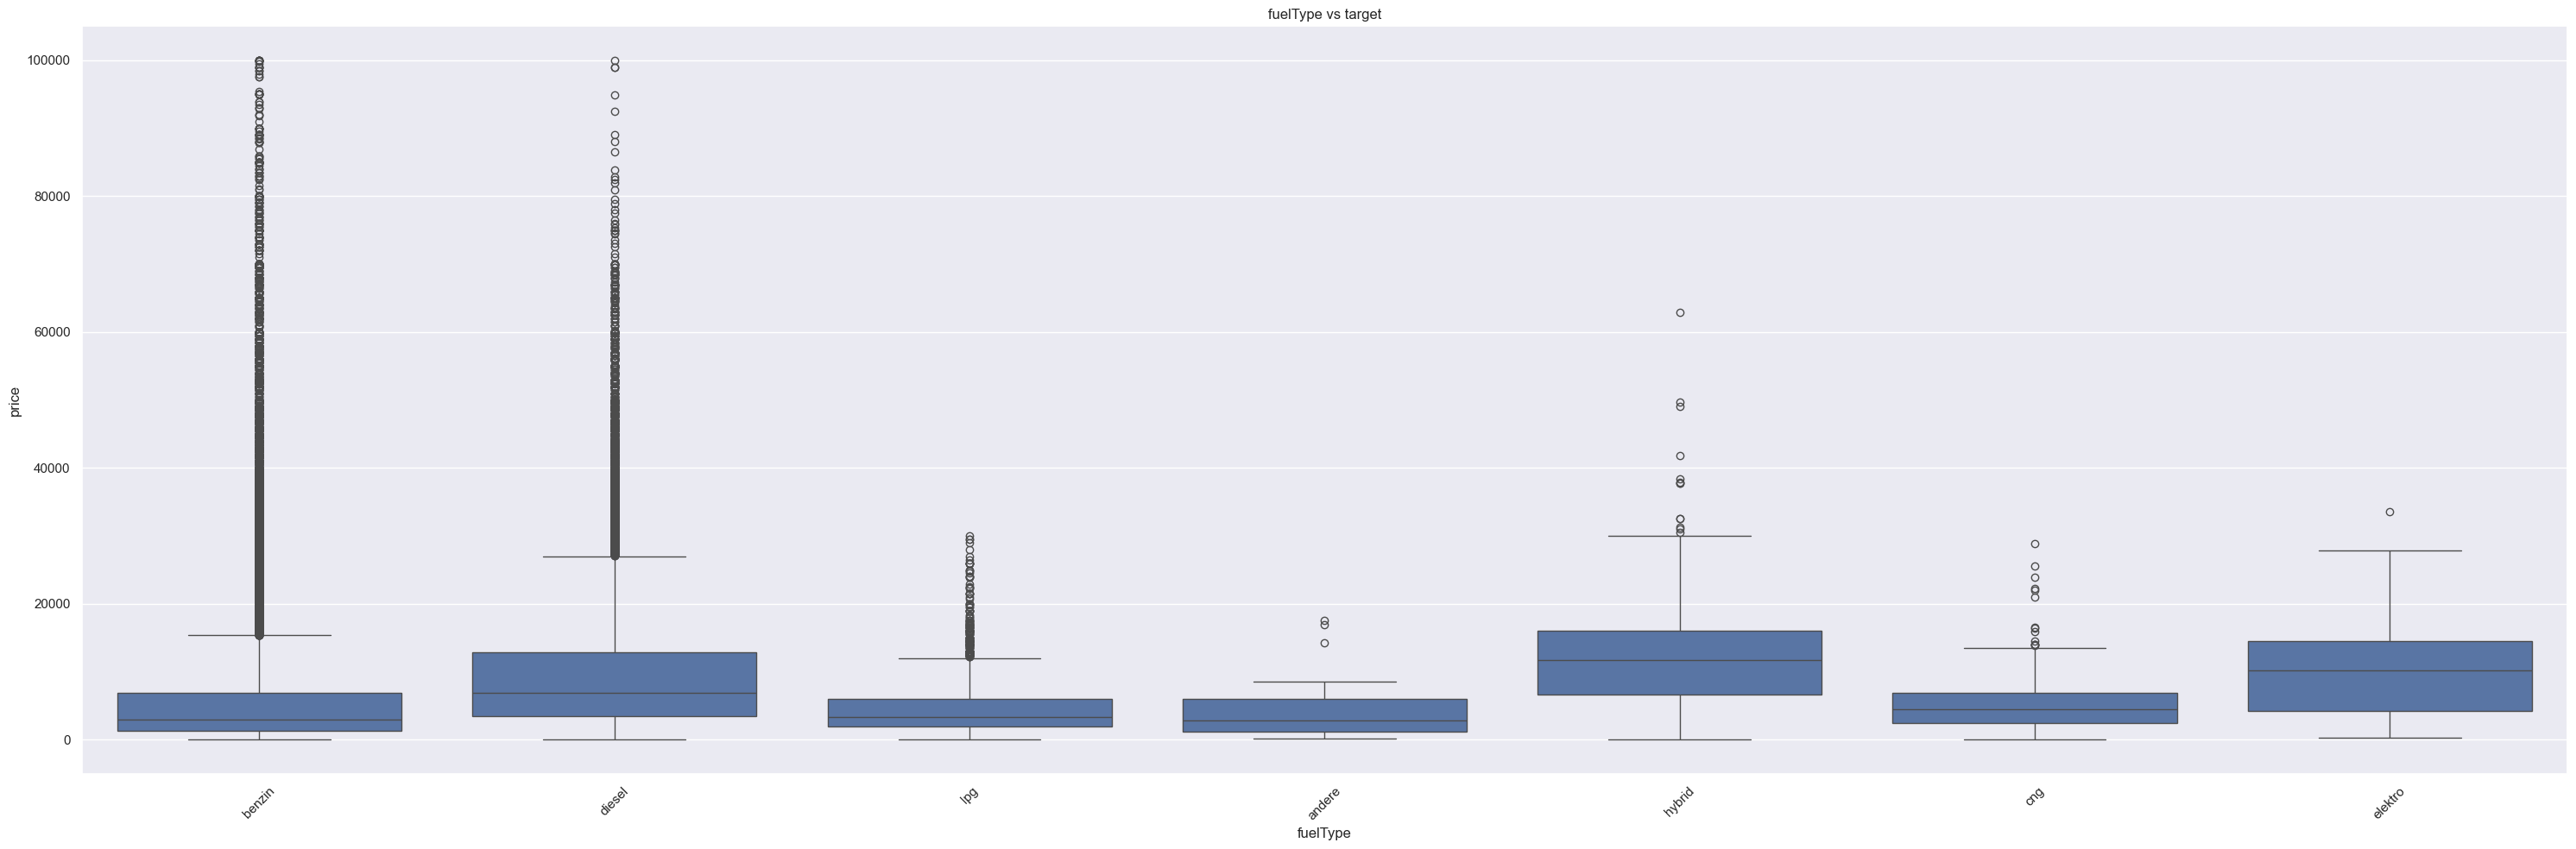

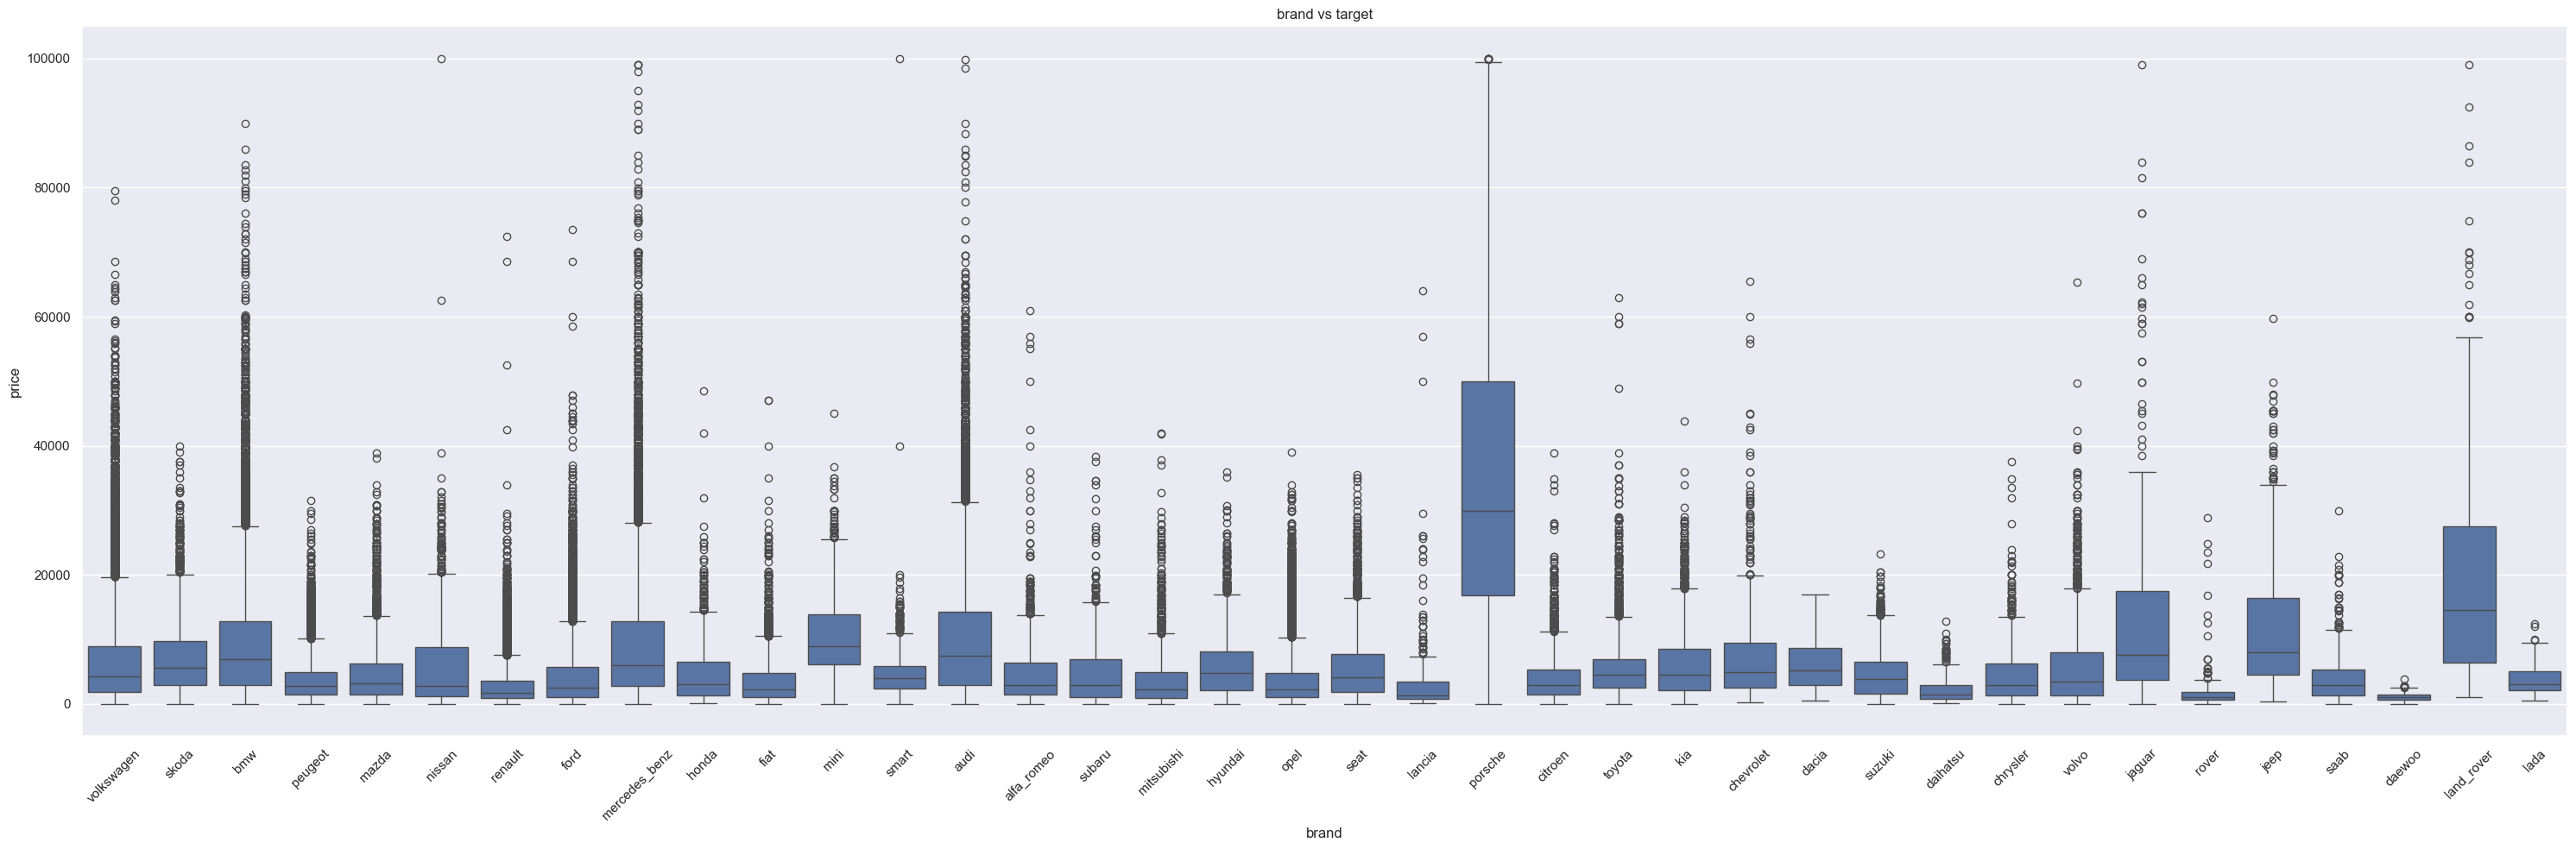

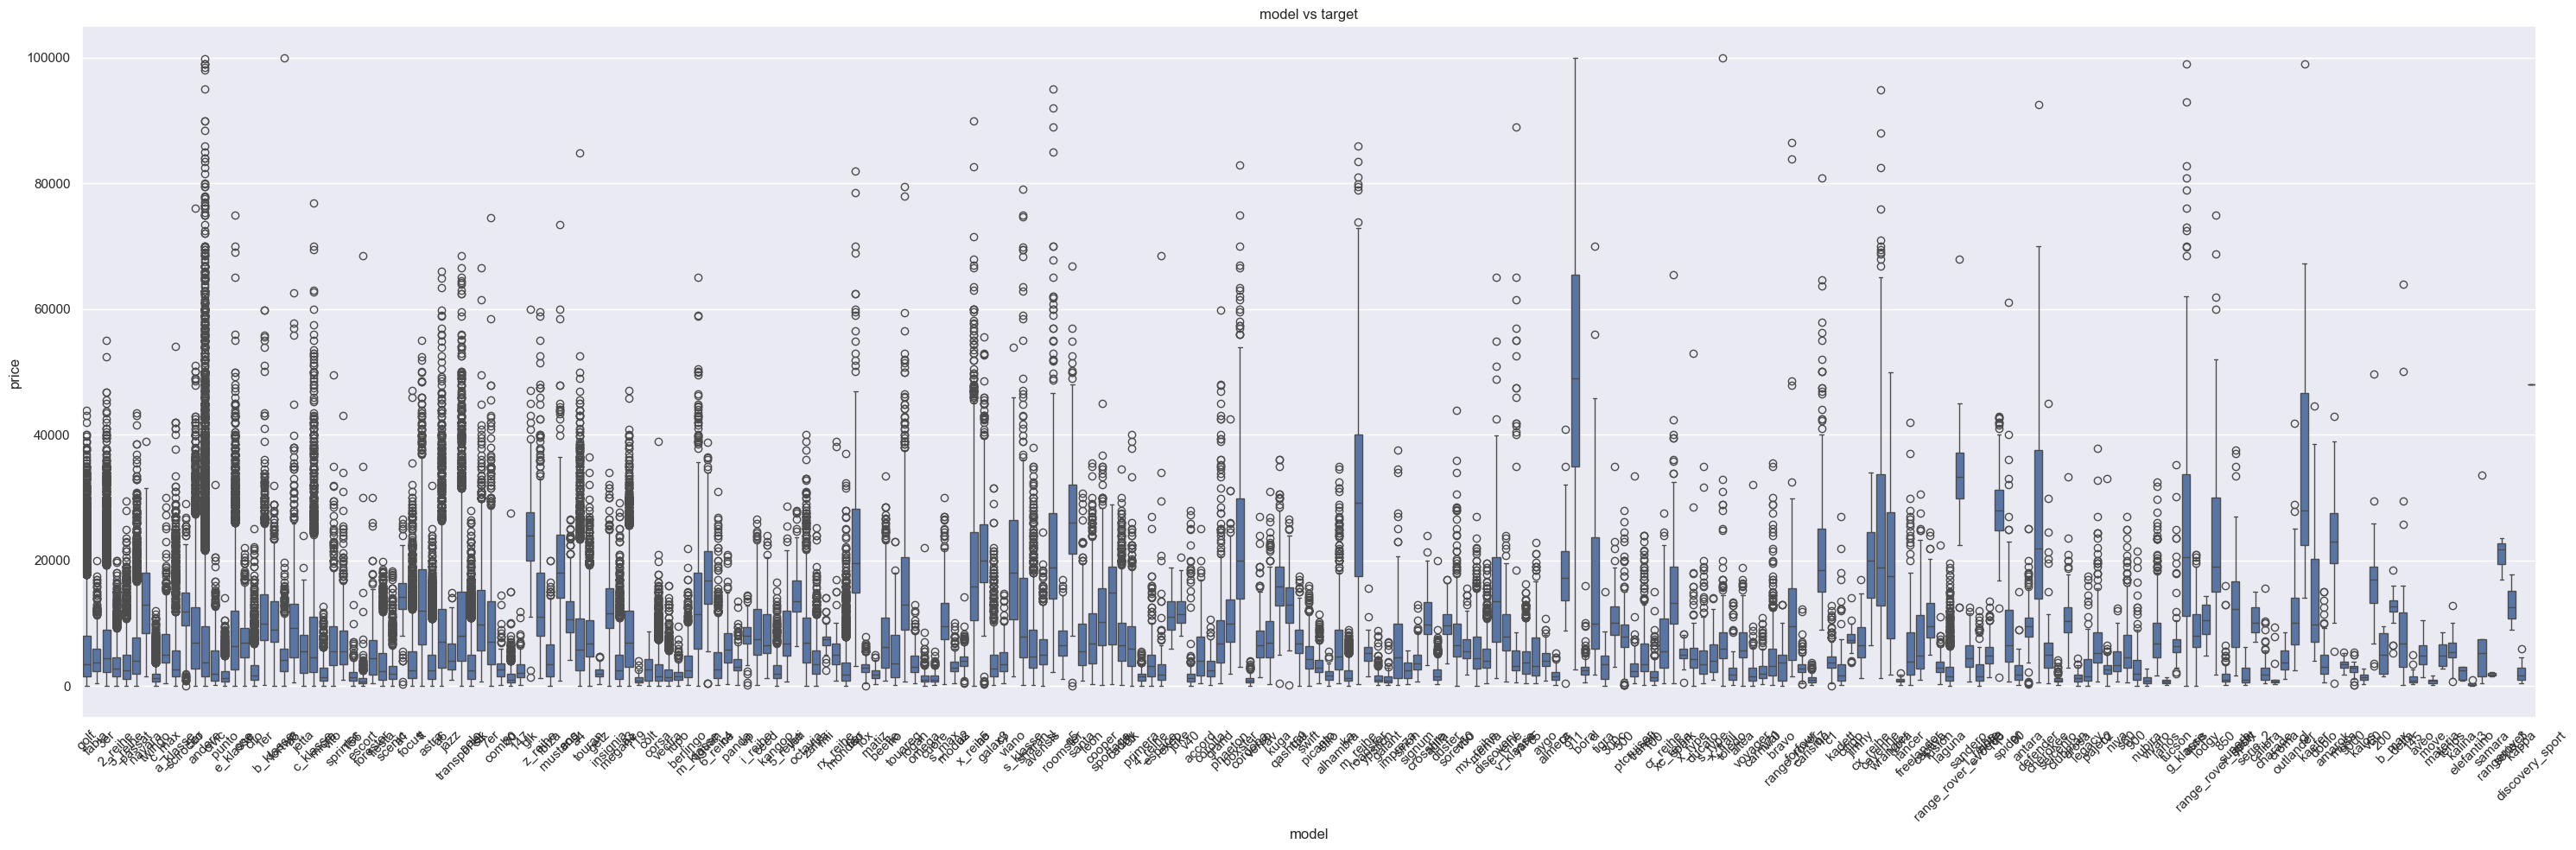

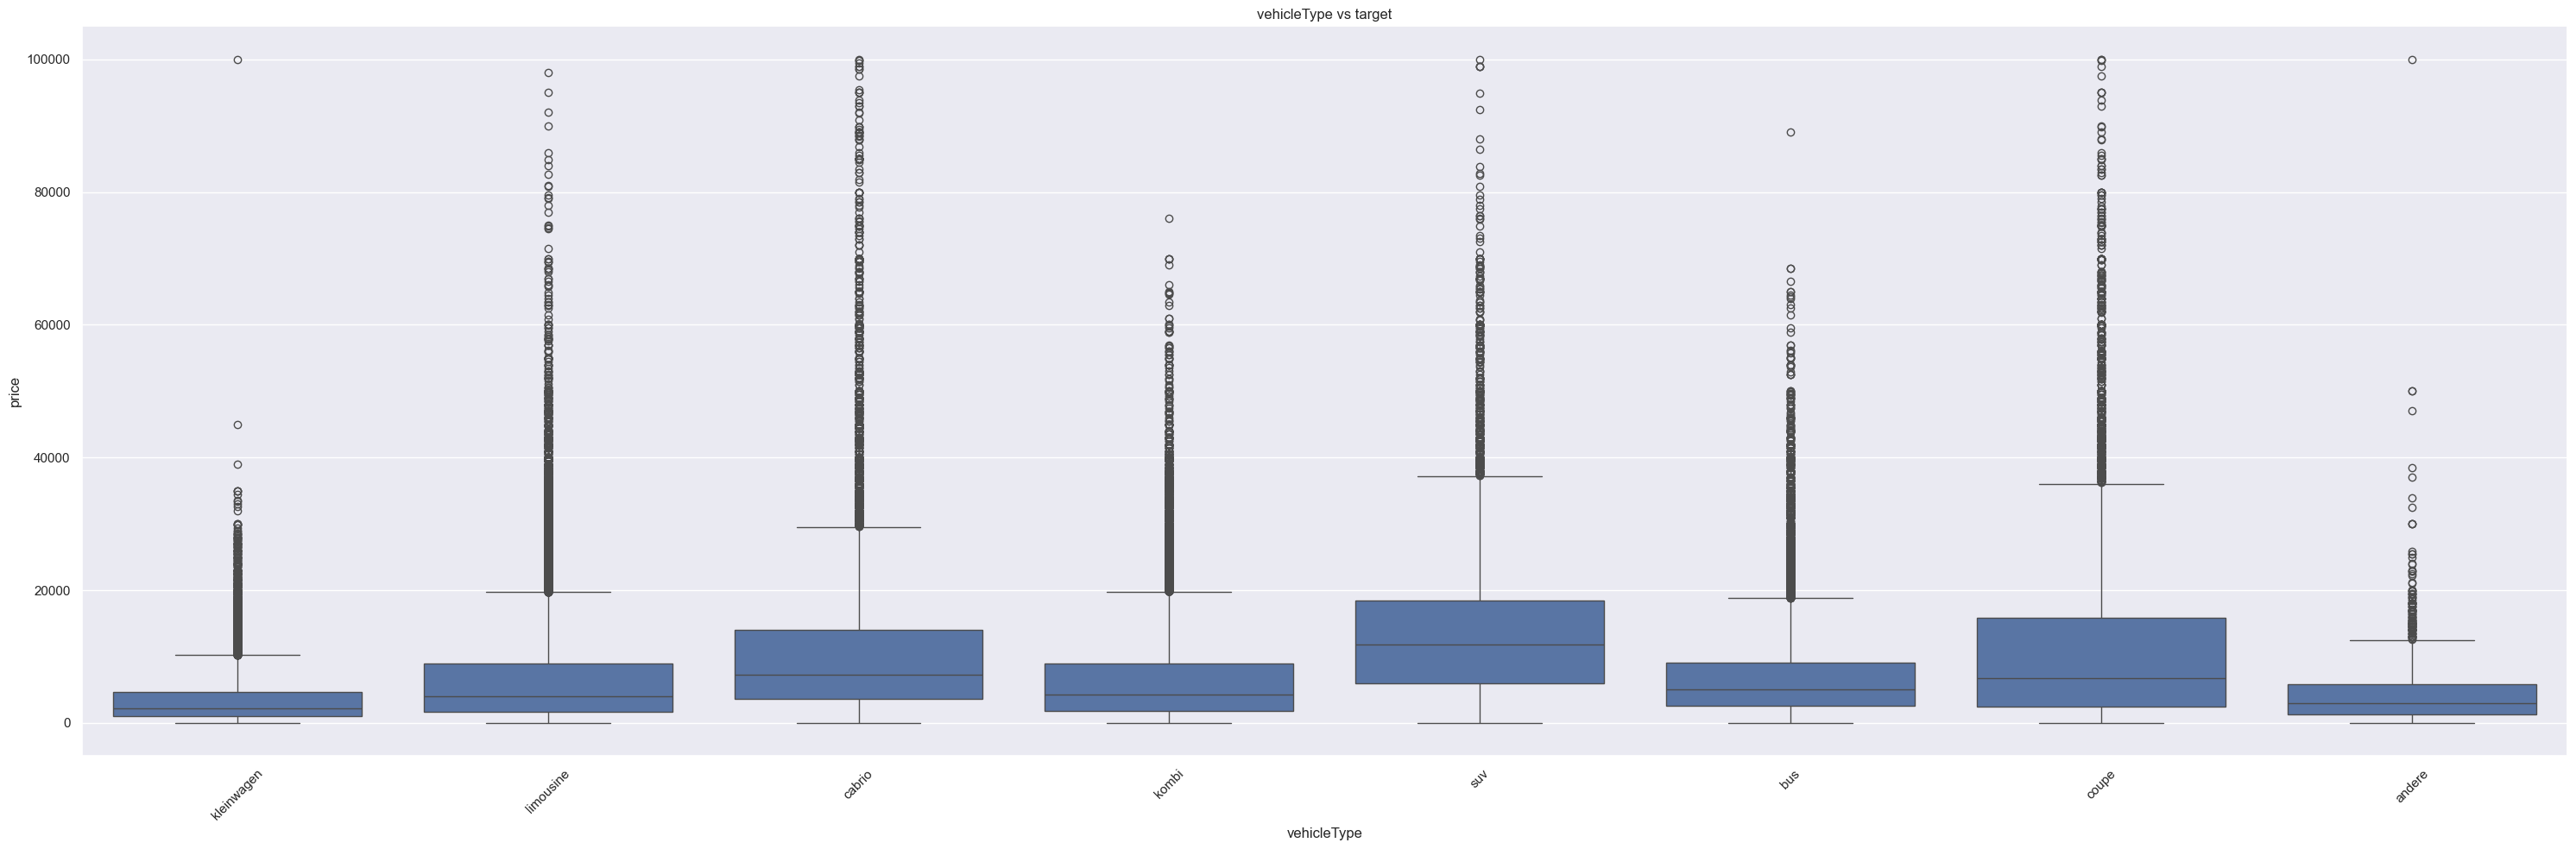

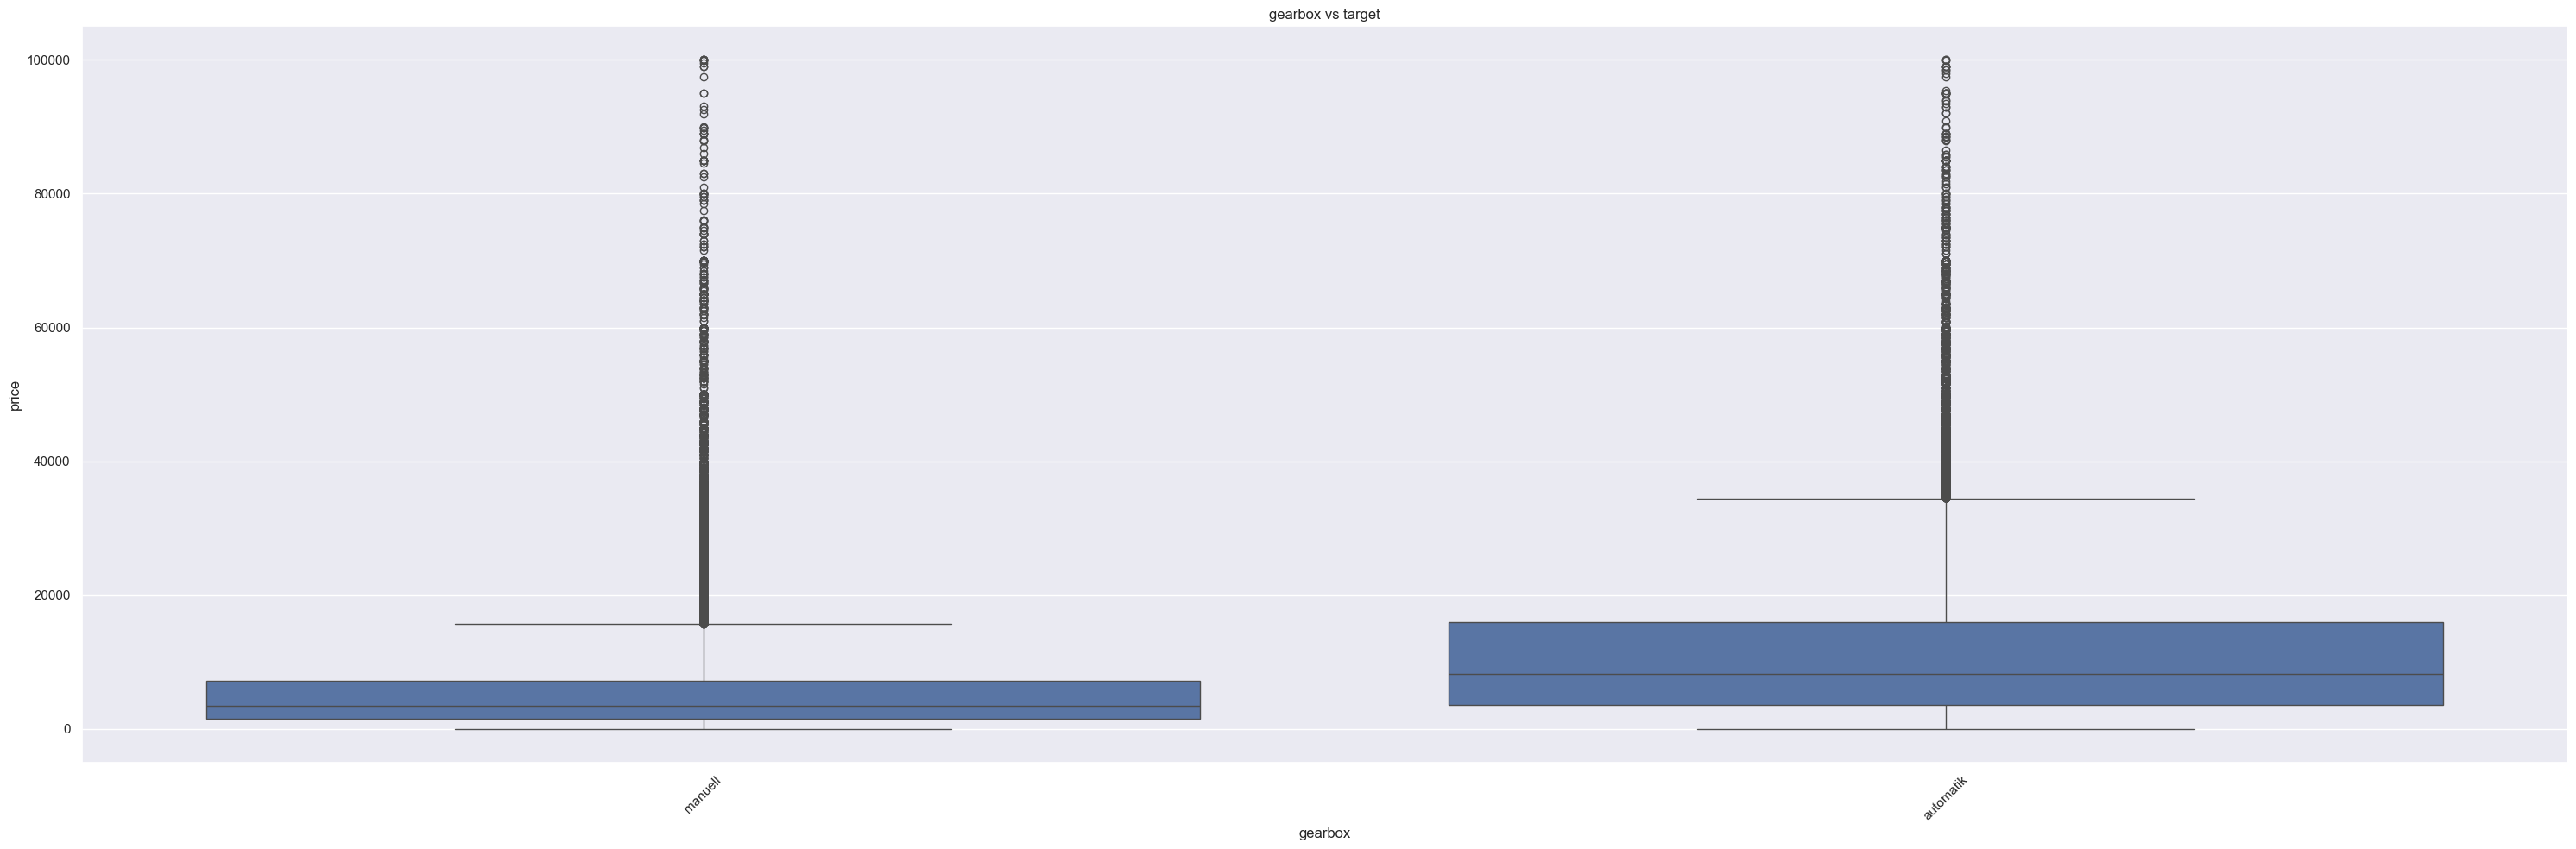

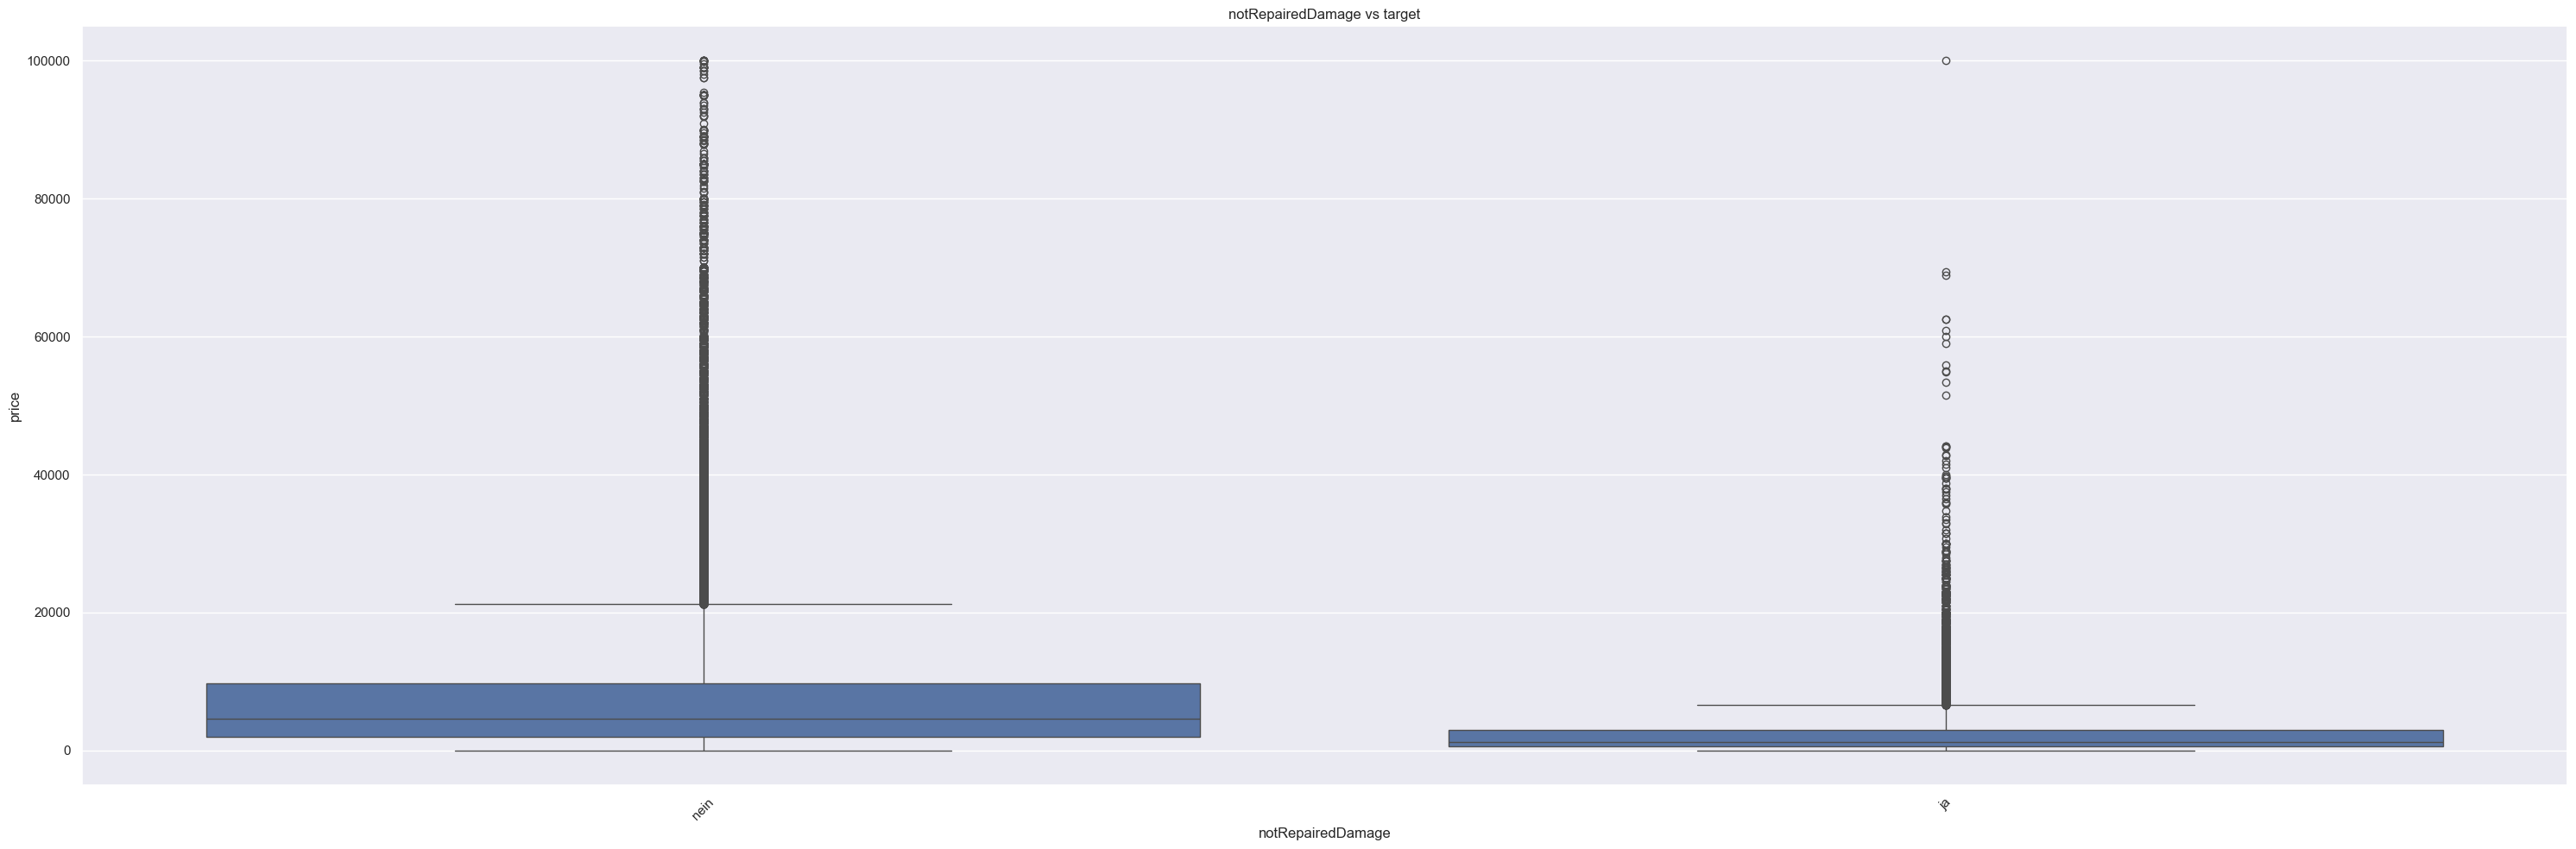

In [21]:
for feat in categorical + other:
    plt.figure(figsize=(30, 10))
    sns.boxplot(x=data[feat], y=data['price'])
    plt.title(f'{feat} vs target')
    plt.xlabel(feat)
    plt.ylabel('price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [22]:
data.groupby(['brand', 'model'])[['price', 'powerPS']].mean()

price     powerPS
brand      model                             
alfa_romeo 145        1217.307692  111.500000
           147        2450.481752  120.927007
           156        1694.864169  151.245902
           159        7434.587571  173.242938
           andere     7499.156909  148.070258
...                           ...         ...
volvo      v40        2084.310891  124.273267
           v50        6165.677570  139.088785
           v60       16950.909091  172.022727
           v70        4883.847784  168.836224
           xc_reihe  15196.026230  188.383607

[295 rows x 2 columns]

In [23]:
data[data['notRepairedDamage'] == 'nein'].groupby(['brand', 'model', 'vehicleType'])[['price', 'powerPS']].median()

price  powerPS
brand      model    vehicleType                  
alfa_romeo 145      andere         500.0    100.0
                    coupe          750.0    103.0
                    kleinwagen    1000.0    103.0
                    limousine     1250.0    111.0
           147      andere        1799.5    112.5
...                                  ...      ...
volvo      v60      limousine     3399.5    174.5
           v70      coupe          500.0    190.0
                    kombi         3650.0    163.0
           xc_reihe kombi        11670.0    185.0
                    suv          13900.0    185.0

[1196 rows x 2 columns]

In [24]:
data[data['brand'] == 'volvo']['model'].unique()

array(['v40', 'v50', 'andere', 'c_reihe', 'xc_reihe', 'v70', 's60', '850',
       'v60'], dtype=object)

In [25]:
data.groupby(['brand', 'model', 'vehicleType', 'fuelType'])['price'].mean().reset_index()

,brand,model,vehicleType,fuelType,price
0,alfa_romeo,145,andere,benzin,500.000000
1,alfa_romeo,145,coupe,benzin,750.000000
2,alfa_romeo,145,kleinwagen,benzin,972.583333
3,alfa_romeo,145,limousine,benzin,1560.750000
4,alfa_romeo,147,andere,benzin,1566.333333
...,...,...,...,...,...
2527,volvo,xc_reihe,kombi,lpg,4225.000000
2528,volvo,xc_reihe,limousine,diesel,6500.000000
2529,volvo,xc_reihe,suv,benzin,11138.956522
2530,volvo,xc_reihe,suv,diesel,15957.388889


In [26]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


In [27]:
data.groupby(['notRepairedDamage', 'vehicleType'])['price'].median().reset_index()

,notRepairedDamage,vehicleType,price
0,ja,andere,1200.0
1,ja,bus,1982.5
2,ja,cabrio,1800.0
3,ja,coupe,1600.0
4,ja,kleinwagen,799.0
5,ja,kombi,1250.0
6,ja,limousine,1200.0
7,ja,suv,3900.0
8,nein,andere,3500.0
9,nein,bus,5500.0


In [28]:
data.groupby(['notRepairedDamage', 'fuelType'])['price'].median().reset_index()

,notRepairedDamage,fuelType,price
0,ja,andere,1200.0
1,ja,benzin,900.0
2,ja,cng,1500.0
3,ja,diesel,2600.0
4,ja,elektro,6125.0
5,ja,hybrid,5399.5
6,ja,lpg,1500.0
7,nein,andere,4575.0
8,nein,benzin,3400.0
9,nein,cng,4700.0


In [29]:
data.groupby(['notRepairedDamage', 'gearbox'])['price'].median().reset_index()

,notRepairedDamage,gearbox,price
0,ja,automatik,2100.0
1,ja,manuell,1099.0
2,nein,automatik,8950.0
3,nein,manuell,3800.0


In [30]:
data.groupby(['fuelType', 'gearbox'])['price'].median().reset_index()

,fuelType,gearbox,price
0,andere,automatik,4200.0
1,andere,manuell,2800.0
2,benzin,automatik,5600.0
3,benzin,manuell,2650.0
4,cng,automatik,5800.0
5,cng,manuell,4274.5
6,diesel,automatik,10999.0
7,diesel,manuell,5490.0
8,elektro,automatik,12749.0
9,elektro,manuell,3550.0


In [31]:
data.groupby(['fuelType', 'gearbox','notRepairedDamage'])['price'].median().reset_index()

,fuelType,gearbox,notRepairedDamage,price
0,andere,automatik,ja,1300.0
1,andere,automatik,nein,5990.0
2,andere,manuell,ja,1050.0
3,andere,manuell,nein,4000.0
4,benzin,automatik,ja,1350.0
5,benzin,automatik,nein,6290.0
6,benzin,manuell,ja,850.0
7,benzin,manuell,nein,2990.0
8,cng,automatik,ja,1650.0
9,cng,automatik,nein,5800.0


In [32]:
data.groupby(['vehicleType', 'gearbox'])['price'].median().reset_index()

,vehicleType,gearbox,price
0,andere,automatik,6145.0
1,andere,manuell,2800.0
2,bus,automatik,8500.0
3,bus,manuell,4599.0
4,cabrio,automatik,12300.0
5,cabrio,manuell,6000.0
6,coupe,automatik,12965.0
7,coupe,manuell,4700.0
8,kleinwagen,automatik,2900.0
9,kleinwagen,manuell,2200.0


In [33]:
med = (
    data
    .groupby(['fuelType', 'gearbox', 'notRepairedDamage'])['price']
    .median()
    .unstack('notRepairedDamage')
    .reset_index()
)

med['ratio_nien_vs_ja'] = med['nein'] / med['ja']

print(med)


notRepairedDamage fuelType    gearbox       ja     nein  ratio_nien_vs_ja
0                   andere  automatik   1300.0   5990.0          4.607692
1                   andere    manuell   1050.0   4000.0          3.809524
2                   benzin  automatik   1350.0   6290.0          4.659259
3                   benzin    manuell    850.0   2990.0          3.517647
4                      cng  automatik   1650.0   5800.0          3.515152
5                      cng    manuell   1500.0   4555.0          3.036667
6                   diesel  automatik   4300.0  11700.0          2.720930
7                   diesel    manuell   2200.0   5880.0          2.672727
8                  elektro  automatik  11900.0  12824.5          1.077689
9                  elektro    manuell    350.0   3600.0         10.285714
10                  hybrid  automatik   7100.0  12650.0          1.781690
11                  hybrid    manuell    700.0   9990.0         14.271429
12                     lpg  automatik 

In [34]:
bins = [0, 12, 36, 60, 120, np.inf]

labels = [
    '0–12_month',
    '12–36_month',
    '36–60_month',
    '60–120_month',
    '120_plus_month'
]

data['age_group'] = pd.cut(
    data['autoAgeMonths'],
    bins=bins,
    labels=labels,
    right=False 
)

data.groupby(['brand', 'age_group'])['price'].mean().reset_index().sort_values('price', ascending=False).head(20)

C:\Users\Мотян\AppData\Local\Temp\ipykernel_10388\1817347423.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['brand', 'age_group'])['price'].mean().reset_index().sort_values('price', ascending=False).head(20)


,brand,age_group,price
130,porsche,0–12_month,68956.583333
131,porsche,12–36_month,63094.522388
132,porsche,36–60_month,59080.462121
90,land_rover,0–12_month,57341.388889
85,lancia,0–12_month,56900.000000
0,alfa_romeo,0–12_month,55900.000000
66,jaguar,12–36_month,46483.846154
65,jaguar,0–12_month,46000.000000
100,mercedes_benz,0–12_month,40130.421569
91,land_rover,12–36_month,39970.927273


In [35]:
data['price'].describe()

count    241190.000000
mean       6887.741892
std        8024.451993
min           1.000000
25%        1750.000000
50%        4100.000000
75%        8999.000000
max       99999.000000
Name: price, dtype: float64

In [36]:
data[data.price < 10].count()

brand                287
model                287
vehicleType          287
gearbox              287
fuelType             287
notRepairedDamage    287
powerPS              287
kilometer            287
autoAgeMonths        287
price                287
age_group            287
dtype: int64

In [37]:
#Тут нет отчистки от выбросов по сути, минимальная обратка данных

#План такой:
# 1. Убираем модели - объединяем модель с ее типом (+ возраст тоже подскажет какая модель хрень)
# 2. Убираем тупые случаи, когда fuelType не стакается с gearbox (не понимаю есть ли они)
# 3. vehicleType + gearbox  (дает лучшее понимание о машине), соединяем
# 4. Преобразовыывам notRepairedDamage
# 5. autoAgeMonths преобразовываем через 1/ (x + 50)
# 6. удалим когда data[data.price < 10].count()

In [38]:
cond1 = data['price'] <= 10 
cond2 = (data['fuelType'] == 'elektro') & (data['gearbox']  == 'manuell')
data = data[~(cond1 | cond2)]
data['gear_and_vehic'] = data['fuelType'] + '_' + data['vehicleType']
data['giperb_autoAgeMonths'] = 1 / (data['autoAgeMonths'] + 50)
data['notRepairedDamage'].replace({'nein' : 0, 'ja' : 1}, inplace=True)
data.head()

C:\Users\Мотян\AppData\Local\Temp\ipykernel_10388\3606719550.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['notRepairedDamage'].replace({'nein' : 0, 'ja' : 1}, inplace=True)
C:\Users\Мотян\AppData\Local\Temp\ipykernel_10388\3606719550.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  da

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,age_group,gear_and_vehic,giperb_autoAgeMonths
0,volkswagen,golf,kleinwagen,manuell,benzin,0,75,150000,177,1500,120_plus_month,benzin_kleinwagen,0.004405
1,skoda,fabia,kleinwagen,manuell,diesel,0,69,90000,93,3600,60–120_month,diesel_kleinwagen,0.006993
2,bmw,3er,limousine,manuell,benzin,1,102,150000,246,650,120_plus_month,benzin_limousine,0.003378
3,peugeot,2_reihe,cabrio,manuell,benzin,0,109,150000,140,2200,120_plus_month,benzin_cabrio,0.005263
4,mazda,3_reihe,limousine,manuell,benzin,0,105,150000,136,2000,120_plus_month,benzin_limousine,0.005376


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240890 entries, 0 to 241189
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   brand                 240890 non-null  object  
 1   model                 240890 non-null  object  
 2   vehicleType           240890 non-null  object  
 3   gearbox               240890 non-null  object  
 4   fuelType              240890 non-null  object  
 5   notRepairedDamage     240890 non-null  int64   
 6   powerPS               240890 non-null  int64   
 7   kilometer             240890 non-null  int64   
 8   autoAgeMonths         240890 non-null  int64   
 9   price                 240890 non-null  int64   
 10  age_group             240890 non-null  category
 11  gear_and_vehic        240890 non-null  object  
 12  giperb_autoAgeMonths  240890 non-null  float64 
dtypes: category(1), float64(1), int64(5), object(6)
memory usage: 24.1+ MB


In [40]:
categorical = ['brand', 'gear_and_vehic', 'fuelType']
numeric = ['powerPS', 'kilometer', 'giperb_autoAgeMonths']
other =['notRepairedDamage']


In [41]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['price']

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [43]:
# YOUR CODE (data split into train/val/test):
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=52)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11, random_state=11)

In [44]:
X_train, X_val, X_test, y_train, y_val, y_test = X_train.toarray(), X_val.toarray(), X_test.toarray(), y_train.to_numpy(), y_val.to_numpy(), y_test.to_numpy()

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [45]:
X_val.shape[1]
# Не знаю почему подбор параметров идет по авалидационной

103

In [46]:
# YOUR CODE:
from sklearn.metrics import r2_score
from descents import get_descent
from linear_regression import LinearRegression

result = { 
    'full' : { 
                'learning_rate' : 100 ,
                'r2_train' : -1 * np.inf,
                'r2_test' : -1 * np.inf,
                'iters' : 0

    },
    'stochastic' : { 
                'learning_rate' : 100,              
                'r2_train' : -1 * np.inf,
                'r2_test' : -1 * np.inf,
                'iters' : 0
                                    
    },
    'momentum' : {
                'learning_rate' : 100,                
                'r2_train' : -1 * np.inf,
                'r2_test' : -1 * np.inf,
                'iters' : 0
                                    
    },
    'adam' : { 
                'learning_rate' : 100,              
                'r2_train' : -1 * np.inf,
                'r2_test' : -1 * np.inf,
                'iters' : 0                                           
    }
}

dimension= X_val.shape[1]
learning_rates = np.logspace(np.log10(0.2), 0, num=10)

for gd_type in result.keys():
    for learning_rate in learning_rates: 
        descent_config = {
            'descent_name': gd_type,
            'kwargs': {
                'dimension': dimension,
                'lambda_': learning_rate
            }
        }

        regression = LinearRegression(
            descent_config=descent_config)

        regression.fit(X_val, y_val)

        y_train_pred = regression.predict(X_train)
        r2_train = r2_score(y_train, y_train_pred)
        
        if r2_train > result[gd_type]['r2_train']:
            y_test_pred = regression.predict(X_test)
            r2_test = r2_score(y_test, y_test_pred)
            result[gd_type]['r2_train'] = r2_train
            result[gd_type]['r2_test'] = r2_test
            result[gd_type]['iters'] = len(regression.loss_history) - 1
            result[gd_type]['learning_rate'] = learning_rate

In [47]:
for gd_type in result.keys():
    print(gd_type, result[gd_type]['learning_rate'])

full 1.0
stochastic 0.8362510309503736
momentum 0.5848035476425733
adam 1.0


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [48]:
# YOUR CODE:
from sklearn.metrics import mean_squared_error
for gd_type in result.keys():
    descent_config = {
        'descent_name': gd_type,
        'kwargs': {
            'dimension': dimension,
            'lambda_': result[gd_type]['learning_rate']
        }
    }

    regression = LinearRegression(
        descent_config=descent_config)

    regression.fit(X_train, y_train)
    result[gd_type]['loss_on_train'] = regression.loss_history
    y_test_pred = regression.predict(X_test)
    result[gd_type]['mean_squared_error'] = mean_squared_error(y_test, y_test_pred)


In [49]:
for gd_type in result.keys():
    print(gd_type, 
          ':', 
          y_test.mean(), 
          np.sqrt(result[gd_type]['mean_squared_error'])
    )

full : 6871.757275104819 3989.5909575432725
stochastic : 6871.757275104819 4022.7207546821296
momentum : 6871.757275104819 3867.1820980559614
adam : 6871.757275104819 10354.985074727112


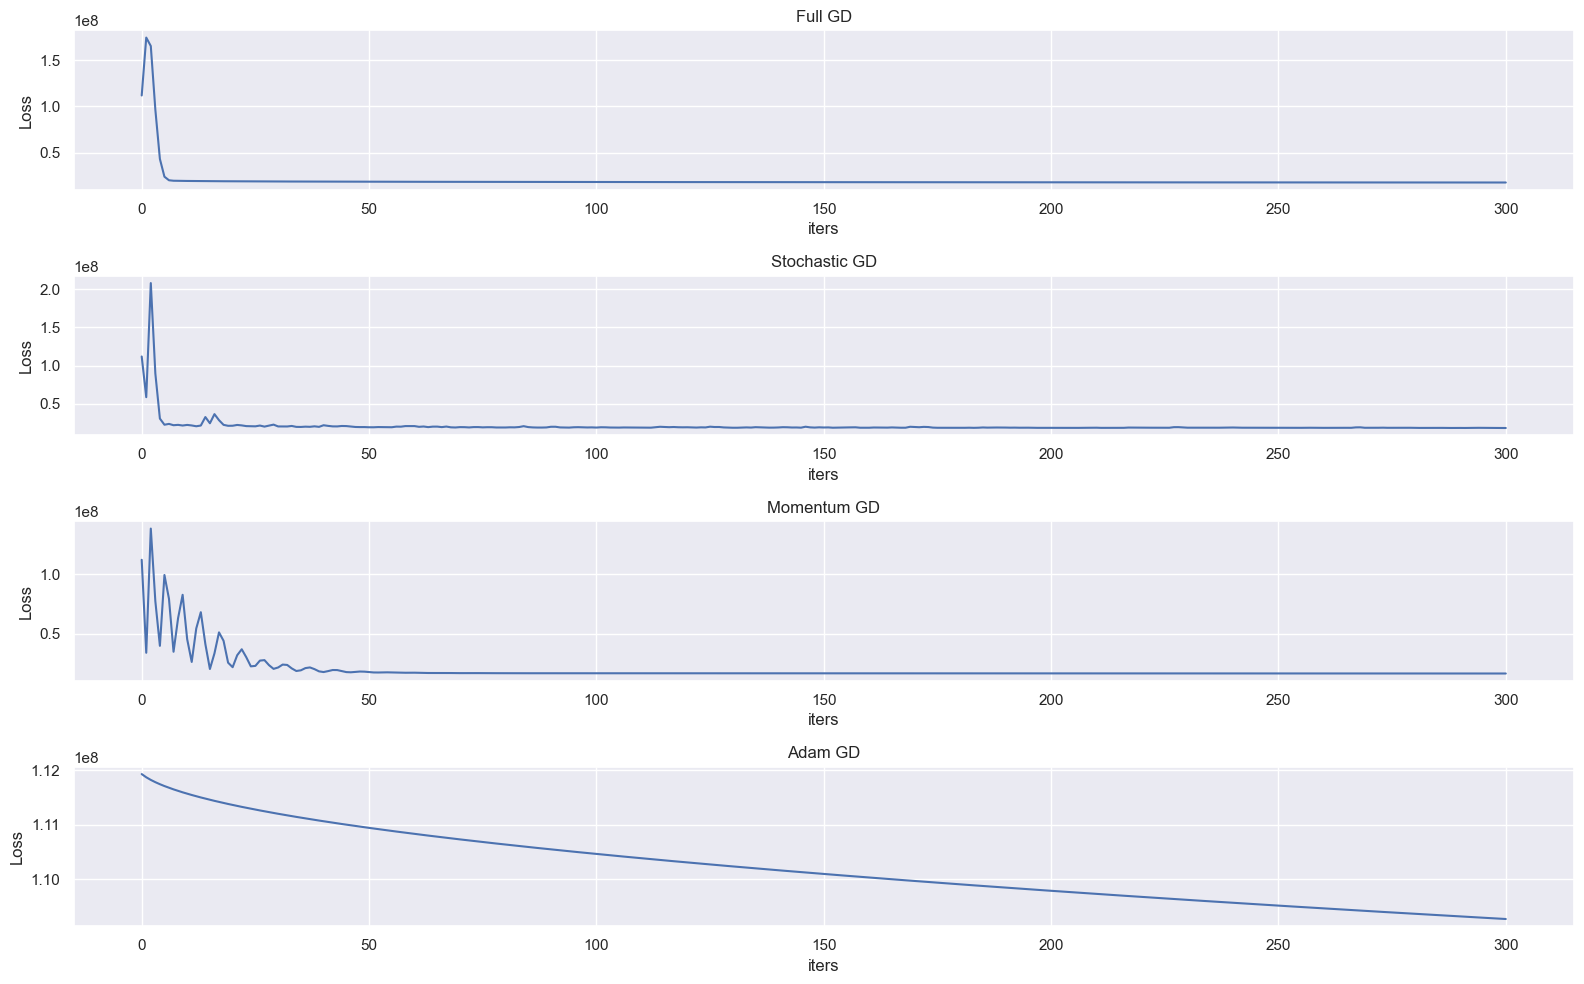

In [50]:
fig, axs = plt.subplots(figsize=(16, 10), nrows=4)
for i, gd_type in enumerate(list(result.keys())):
    axs[i].plot(result[gd_type]['loss_on_train'])
    axs[i].set_xlabel('iters')
    axs[i].set_ylabel('Loss')
    axs[i].set_title(f'{gd_type.capitalize()} GD')
plt.tight_layout()

In [51]:
for gd_type in result.keys():
    print(gd_type, 'Start:', result[gd_type]['loss_on_train'][0], 'End:', result[gd_type]['loss_on_train'][-1])

full Start: 111921145.32602717 End: 17696851.817629427
stochastic Start: 111913918.0145013 End: 17968463.38190441
momentum Start: 111927408.32810605 End: 16555850.113541868
adam Start: 111925409.26587844 End: 109271732.73071162


`### ваше решение тут ###`

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [52]:
import time
batch_sizes = np.arange(5, 1000, 40)

# YOUR CODE:
bs_dict ={'batch_size' : [],
          'time' : [],
          'iters': []
}

for batch_size in batch_sizes:

    descent_config = {
        'descent_name': 'stochastic',
        'kwargs': {
            'dimension': dimension,
            'batch_size': batch_size
        }
    }

    regression = LinearRegression(
        descent_config=descent_config,
        tolerance = 3.5e-1,
        max_iter=1000)
    
    start_time = time.perf_counter()
    fit_result = regression.fit(X_train, y_train)
    secs = time.perf_counter() - start_time
    
    bs_dict['batch_size'].append(batch_size)
    bs_dict['time'].append(secs)
    bs_dict['iters'].append(len(regression.loss_history) - 1)

In [53]:
pd.DataFrame(bs_dict)

,batch_size,time,iters
0,5,2.572751,90
1,45,11.847337,478
2,85,12.966487,542
3,125,14.402332,559
4,165,15.398847,587
5,205,16.585989,649
6,245,15.364214,599
7,285,15.869976,623
8,325,18.463264,704
9,365,18.968026,756


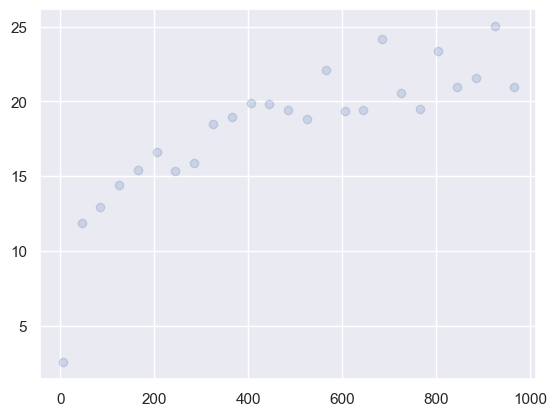

In [54]:
plt.scatter(x=bs_dict['batch_size'], y=bs_dict['time'], alpha=0.2)

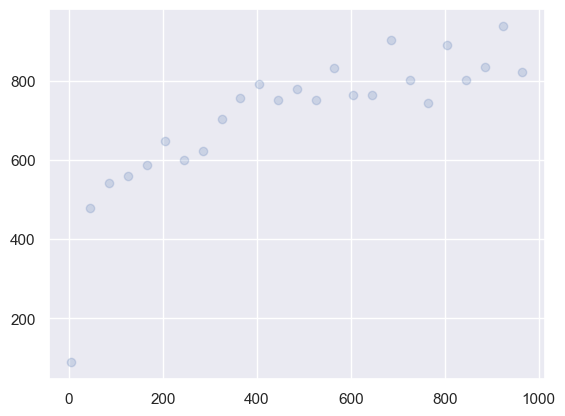

In [55]:
plt.scatter(x=bs_dict['batch_size'], y=bs_dict['iters'], alpha=0.2)

`### ваше решение тут ###`

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [56]:
# YOUR CODE:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import GridSearchCV

class MyRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, descent_name='full', lambda_=1e-3, mu=0.0):
        self.descent_name = descent_name
        self.lambda_ = lambda_
        self.mu = mu

    def fit(self, X, y):
        config = {
            'descent_name': self.descent_name,
            'regularized': True,
            'kwargs': {
                'dimension': X.shape[1],
                'lambda_': self.lambda_,
                'mu': self.mu
            }
        }

        self.model_ = LinearRegression(descent_config=config)
        self.model_.fit(X, y)
    
        return self

    def predict(self, X):
        return self.model_.predict(X)

result_with_reg = {}
gd_types = ['full', 'stochastic', 'momentum', 'adam']
param_grid = {
        'lambda_': np.logspace(-1, 0, 6),
        'mu': np.logspace(-2, 1, 7)
}

for gd_type in gd_types:
    gs = GridSearchCV(
            MyRegressor(descent_name=gd_type), 
            param_grid, 
            scoring='r2', 
            n_jobs=-1, 
            cv=2)
    
    gs.fit(X_val, y_val)

    bet_model = gs.best_estimator_
    r2_tr = r2_score(y_train, bet_model.predict(X_train))
    r2_ts = r2_score(y_test,  bet_model.predict(X_test))
    iters = len(bet_model.model_.loss_history) - 1
    
    result_with_reg[gd_type] = {
            'r2_train' : r2_tr,
            'r2_test' : r2_ts,
            'iters' : iters,
            'learning_rate' : bet_model.lambda_,
            'mu' : bet_model.mu
    }

In [57]:
result_with_reg

{'full': {'r2_train': 0.7243883184864373,
  'r2_test': 0.7453445908297035,
  'iters': 300,
  'learning_rate': np.float64(1.0),
  'mu': np.float64(0.01)},
 'stochastic': {'r2_train': 0.7145091124019618,
  'r2_test': 0.7315689180454097,
  'iters': 300,
  'learning_rate': np.float64(1.0),
  'mu': np.float64(0.01)},
 'momentum': {'r2_train': 0.7367214952940606,
  'r2_test': 0.7564637131739073,
  'iters': 300,
  'learning_rate': np.float64(1.0),
  'mu': np.float64(0.01)},
 'adam': {'r2_train': -0.6982264913762954,
  'r2_test': -0.7105511798609363,
  'iters': 300,
  'learning_rate': np.float64(1.0),
  'mu': np.float64(0.1)}}

In [58]:
for gd_type in result_with_reg.keys():
    descent_config = {
        'descent_name': gd_type,
        'regularized': True,
        'kwargs': {
            'dimension': dimension,
            'lambda_': result_with_reg[gd_type]['learning_rate'],
            'mu' : result_with_reg[gd_type]['mu']
            
        }
    }

    regression = LinearRegression(
        descent_config=descent_config)

    regression.fit(X_train, y_train)
    result_with_reg[gd_type]['loss_on_train'] = regression.loss_history
    y_test_pred = regression.predict(X_test)
    result_with_reg[gd_type]['mean_squared_error'] = mean_squared_error(y_test, y_test_pred)

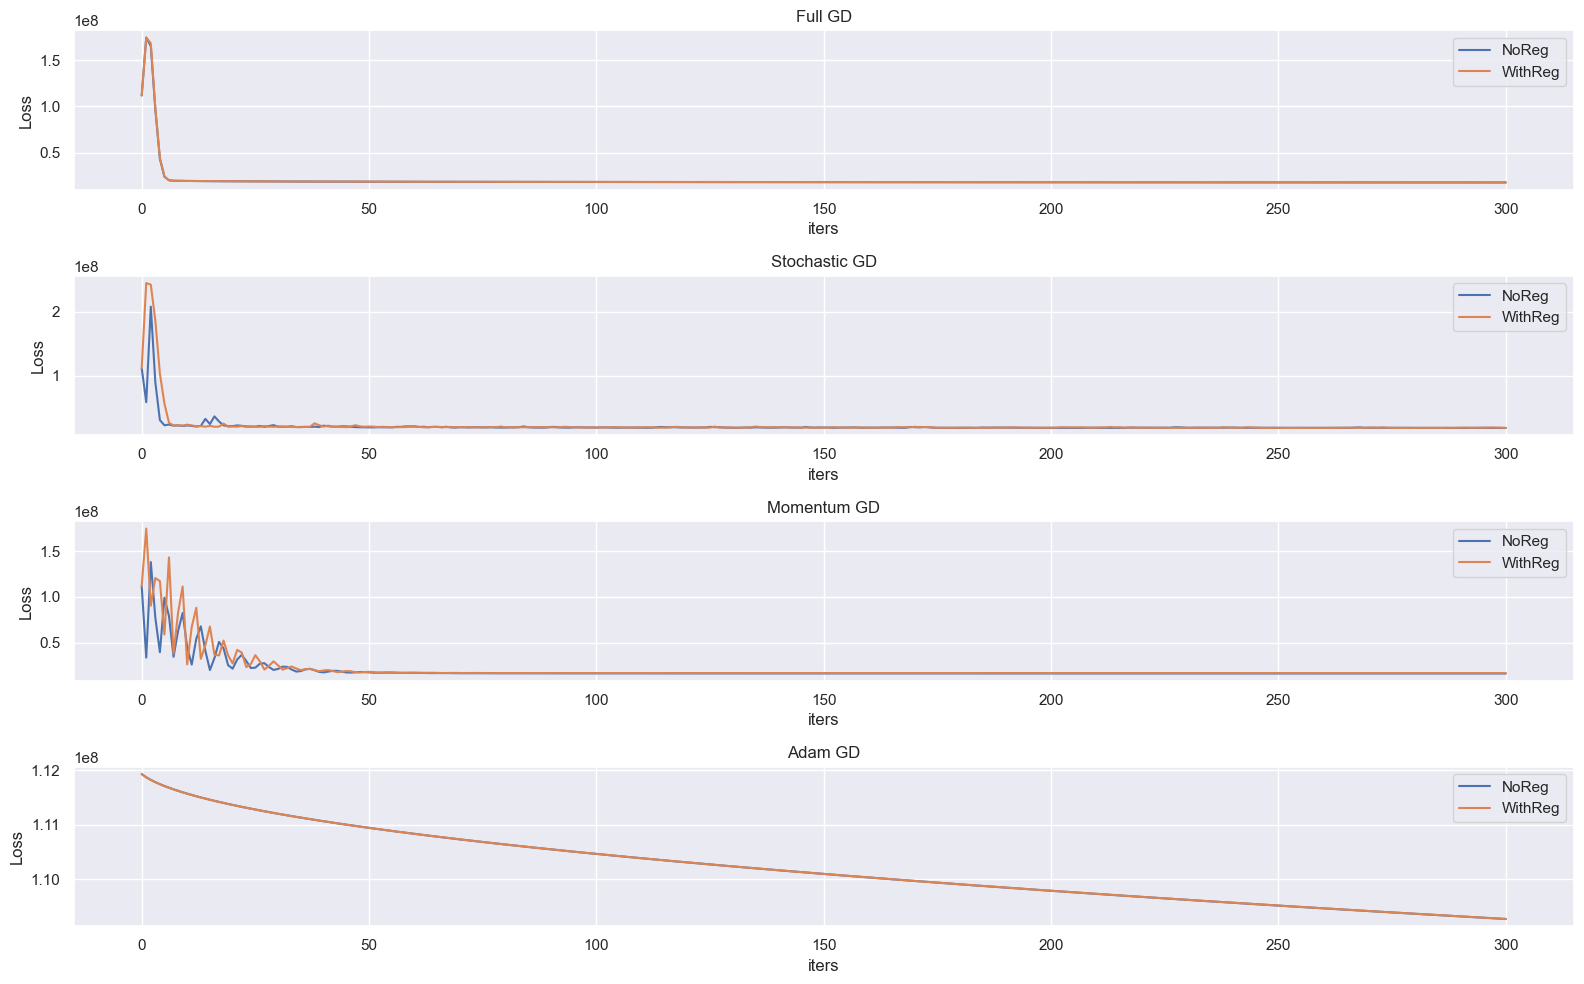

In [59]:
fig, axs = plt.subplots(figsize=(16, 10), nrows=4)
for i, gd_type in enumerate(list(result.keys())):
    axs[i].plot(result[gd_type]['loss_on_train'])
    axs[i].plot(result_with_reg[gd_type]['loss_on_train'])
    axs[i].legend(['NoReg', 'WithReg'])
    axs[i].set_xlabel('iters')
    axs[i].set_ylabel('Loss')
    axs[i].set_title(f'{gd_type.capitalize()} GD')
plt.tight_layout()

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [60]:
# YOUR CODE:
# Дописал, но сравнивать не буду, у меня компьютер взорвется

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

:(

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [61]:
# YOUR CODE
# Дописал, но сравнивать не буду, у меня компьютер взорвется:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [62]:
# YOUR CODE:
# Дописал, но сравнивать не буду, у меня компьютер взорвется